In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

In [2]:
file = "../raw_data/players_22.csv"
df = pd.read_csv(file)
df.head(5)

/Users/yifeisun/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [7]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [16]:
pd.options.display.max_columns=None

In [17]:
df.select_dtypes(include='number')

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1354.0,7.0,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,NaN,NaN,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1325.0,7.0,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,NaN,NaN,3,2,1,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,NaN,NaN,3,2,1,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,NaN,NaN,3,2,1,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,NaN,NaN,3,2,1,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN


In [18]:
df.select_dtypes(exclude='number')

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,nation_position,preferred_foot,work_rate,body_type,real_face,player_tags,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,RW,Left,Medium/Low,Unique,Yes,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,RS,Right,High/Medium,Unique,Yes,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,Manchester United,English Premier League,ST,NaN,2021-08-27,Portugal,ST,Right,High/Low,Unique,Yes,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,Paris Saint-Germain,French Ligue 1,LW,NaN,2017-08-03,Brazil,NaN,Right,High/Medium,Unique,Yes,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",1991-06-28,Manchester City,English Premier League,RCM,NaN,2015-08-30,Belgium,RCM,Right,High/High,Unique,Yes,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,1999-01-02,Wuhan FC,Chinese Super League,SUB,NaN,2021-04-01,China PR,NaN,Right,Medium/Medium,Lean (170-185),No,NaN,NaN,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,46+2,47+2,46+2,46+

In [26]:
df['goalkeeping_speed'].unique()

array([nan, 50., 56., 43., 46., 64., 52., 54., 61., 49., 47., 45., 57.,
       58., 40., 55., 35., 48., 63., 36., 41., 42., 39., 31., 44., 34.,
       51., 37., 59., 28., 60., 26., 53., 25., 38., 29., 21., 32., 65.,
       30., 27., 62., 17., 24., 20., 19., 33., 23., 18., 15., 22., 16.])

In [36]:
df['release_clause_eur']

0        144300000.0
1        197200000.0
2         83300000.0
3        238700000.0
4        232200000.0
            ...     
19234       114000.0
19235       193000.0
19236       175000.0
19237       239000.0
19238       217000.0
Name: release_clause_eur, Length: 19239, dtype: float64

In [37]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

<AxesSubplot:xlabel='age', ylabel='wage_eur'>

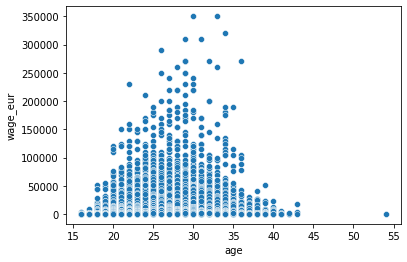

In [39]:
sns.scatterplot(x=df['age'],y=df['wage_eur'])

<AxesSubplot:xlabel='club_team_id', ylabel='wage_eur'>

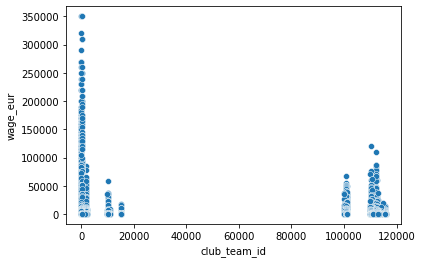

In [40]:
sns.scatterplot(x=df['club_team_id'],y=df['wage_eur'])

<AxesSubplot:xlabel='potential', ylabel='value_eur'>

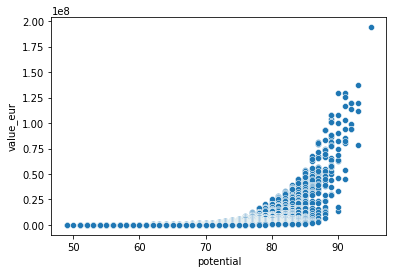

In [43]:
sns.scatterplot(x=df['potential'], y=df['value_eur'])

In [55]:
nationality_name=df['nationality_name'].value_counts().values
nationality_label=df['nationality_name'].value_counts().index
print(nationality_name)
print(nationality_label)

[1719 1214 1086  980  960  897  546  439  413  403  385  385  379  374
  373  355  352  338  338  325  322  321  319  307  293  291  280  266
  223  212  197  192  178  165  156  154  150  137  128  127  125  123
  111  104  101   98   93   78   76   71   69   65   64   63   60   58
   57   53   52   51   49   46   46   37   36   33   30   28   26   25
   24   23   23   22   22   21   21   19   19   17   17   16   16   15
   13   12   12   11   11   11   11   10   10   10    9    9    9    8
    8    8    8    8    8    7    7    7    7    6    6    6    6    5
    5    5    5    5    4    4    4    4    4    3    3    3    3    3
    3    3    3    3    3    2    2    2    2    2    2    2    2    2
    2    2    2    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1]
Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Japan',
       'Netherlands', 'United States', 'Poland',
       ...
       'Vietnam', 'Eritrea', 'Sa

In [57]:
nationality_name_sum=df['nationality_name'].value_counts().values.sum()
nationality_name_sum

19239

In [86]:
df_nation=pd.DataFrame({
    'Nation_name':['England','Germany','Spain','France','Argentina','Other'],
    'Values':[1719,1214,1086,980,960,13280]
})
df_nation

,Nation_name,Values
0,England,1719
1,Germany,1214
2,Spain,1086
3,France,980
4,Argentina,960
5,Other,13280


([<matplotlib.patches.Wedge at 0x150858730>,
 [Text(1.0569477602833353, 0.3047317378154786, 'England'),
  Text(0.7975933370999998, 0.7575254904052314, 'Germany'),
  Text(0.46413379422375384, 0.9972862282511789, 'Spain'),
  Text(0.10786908888081718, 1.0946982505074274, 'France'),
  Text(-0.23851470529840224, 1.0738299378190277, 'Argentina'),
  Text(-0.6190476004494312, -0.9092744736204803, 'Other')],
 [Text(0.5765169601545465, 0.1662173115357156, '8.9 %'),
  Text(0.4350509111454544, 0.4131957220392171, '6.3 %'),
  Text(0.25316388775841114, 0.5439743063188247, '5.6 %'),
  Text(0.0588376848440821, 0.597108136640415, '5.1 %'),
  Text(-0.13009893016276483, 0.5857254206285605, '5.0 %'),
  Text(-0.33766232751787156, -0.49596789470208014, '69.0 %')])

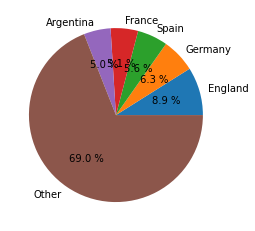

In [104]:
plt.pie(df_nation['Values'],labels=df_nation['Nation_name'],autopct='%3.1f %%')

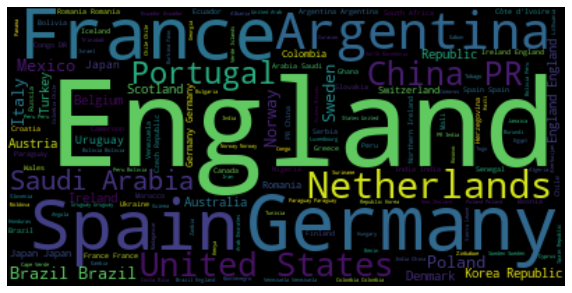

In [89]:
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

{60.0: 530, 59.0: 512, 62.0: 504, 64.0: 503, 61.0: 501}

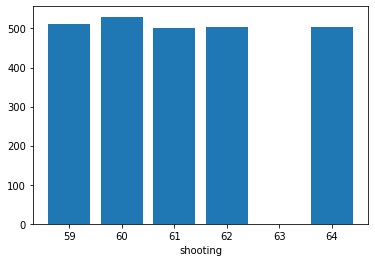

In [105]:
from collections import Counter
bar_plot = dict(Counter(df['shooting'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.xlabel('shooting')
bar_plot

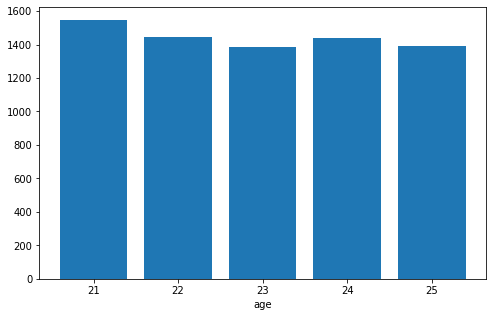

{21: 1547, 22: 1446, 24: 1442, 25: 1394, 23: 1387}

In [109]:
fig,ax=plt.subplots(figsize=(8,5))
bar_plot_age = dict(Counter(df['age'].values).most_common(5))
plt.bar(*zip(*bar_plot_age.items()))
plt.xlabel('age')
plt.show()
bar_plot_age

([<matplotlib.patches.Wedge at 0x150adb040>,
 [Text(-0.6861062030720032, 0.8598013015261836, '21'),
  Text(-1.010682918710681, -0.4341889425428279, '22'),
  Text(0.07512900556026757, -1.0974313794144606, '23'),
  Text(1.0599138342494623, -0.29424932279718796, '24'),
  Text(0.6273548852470677, 0.9035628633120325, '25')],
 [Text(-0.37423974713018354, 0.46898252810519103, '21.4 %'),
  Text(-0.5512815920240077, -0.23683033229608794, '20.0 %'),
  Text(0.040979457578327765, -0.5985989342260692, '19.2 %'),
  Text(0.5781348186815248, -0.16049963061664796, '20.0 %'),
  Text(0.34219357377112786, 0.4928524708974722, '19.3 %')])

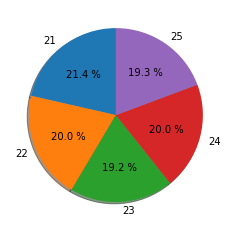

In [103]:
age_labels=list(sorted(bar_plot_age.keys()))
age_values=[bar_plot_age.get(age_labels[i])for i in range(len(age_labels))]
plt.pie(x=age_values,labels=age_labels,autopct='%3.1f %%',shadow=True, labeldistance=1.1, startangle = 90)

# Similarity

In [123]:
df['overall'].unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47])

In [130]:
df_over86=df[df['overall']>86]

In [131]:
df_over86.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 40.8+ KB


In [139]:
df_over86_e=df_over86.select_dtypes(include='number').head(10)
df_over86_e.fillna(df_over86_e.mean())
df_over86_e

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1354.0,7.0,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,NaN,NaN,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1325.0,7.0,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
5,200389,91,93,112000000.0,130000.0,28,188,87,240.0,1.0,13.0,2023.0,44,NaN,NaN,3,1,5,238000000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0
6,231747,91,95,194000000.0,230000.0,22,182,73,73.0,1.0,7.0,2022.0,18,1335.0,10.0,4,5,4,373500000.0,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,NaN
7,167495,90,90,13500000.0,86000.0,35,193,93,21.0,1.0,1.0,2023.0,21,1337.0,1.0,4,1,5,22300000.0,NaN,NaN,NaN,NaN,NaN,NaN,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0
8,192448,90,92,99000000.0,250000.0,29,187,85,241.0,1.0,1.0,2025.0,21,NaN,NaN,4,1,4,210400000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,14,11,61,14,21,18,12,63,30,38,50,39,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,43.0
9,202126,90,90,129500000.0,240000.0,27,188,89,18.0,1.0,10.0,2024.0,14,1318.0,9.0,5,3,4,246100000.0,70.0,91.0,83.0,83.0,47.0,83.0,80,94,86,85,88,83,83,65,86,85,65,74,71,92,70,91,79,83,85,86,80,44,94,87,91,91,50,36,38,8,10,11,14,11,NaN


In [153]:
df_over86_shortname=df_over86['short_name']
df_over86_shortname[0]

'L. Messi'

In [157]:
new_df=df_over86_e.join(df_over86_shortname)

In [164]:
names=new_df['short_name']
value=int(new_df['value_eur'])

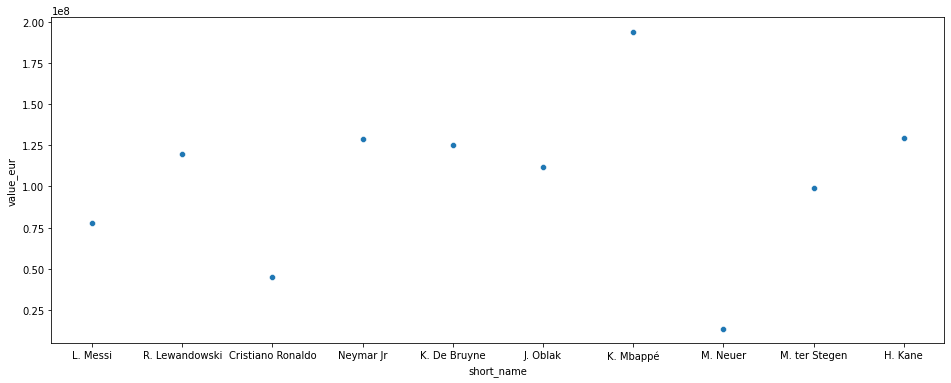

In [174]:
fig,ax=plt.subplots(figsize=(16,6))
sns.scatterplot(x=names,y=value,data=new_df)
plt.show()

## players who's overall is above 86

In [213]:
df_86=df[df.overall>86].select_dtypes(include='number')
df_86=df_86.fillna(df_86.mean())

In [214]:
from sklearn import preprocessing
x = df_86.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
reduced['cluster'] = clusters
reduced['name'] = df_over86['short_name']
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.tail(3)

,x,y,cluster,name
44,-0.844548,0.984855,2,T. Alexander-Arnold
45,-0.635245,-0.434397,0,J. Sancho
46,0.238179,2.036241,3,Rúben Dias


/Users/yifeisun/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


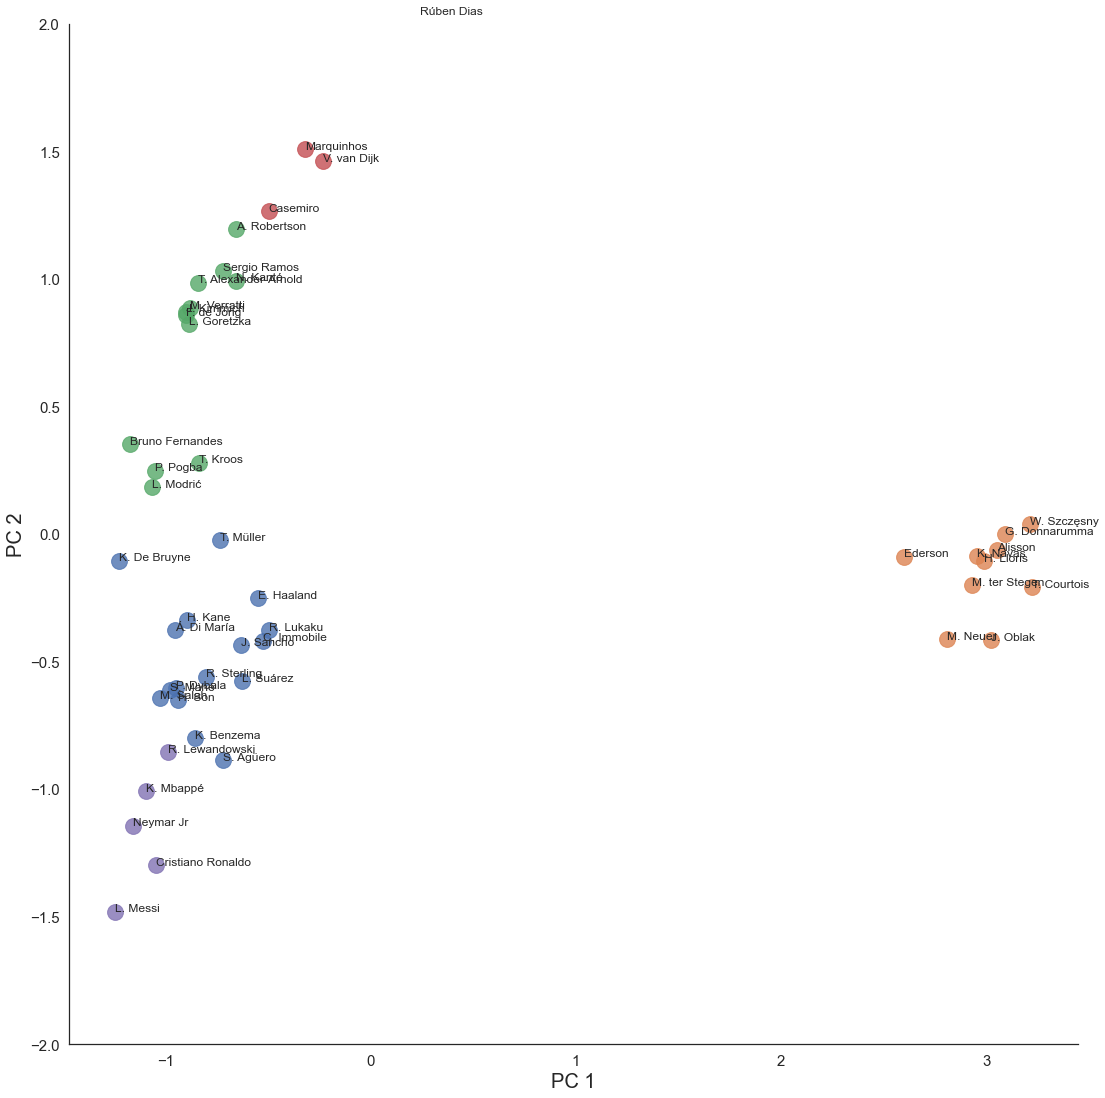

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
fit_reg=False, size = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()

## Values under 50 players

In [241]:
df_under50=df[df['overall']<50]
df_under50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 19100 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 120.5+ KB


In [242]:
df_under50['short_name'].head()

19100      J. Russell
19101    Yang Guoyuan
19102    G. Figliuzzi
19103         J. Haak
19104    Wang Zhifeng
Name: short_name, dtype: object

In [248]:
df_tail=df_under50.select_dtypes(include='number').tail(10)
df_over50_shortname=df_under50['short_name']
df_over50_shortname=df_over50_shortname[-10:]
df_tail_new=df_tail.join(df_over50_shortname)
df_tail_new

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,short_name
19229,259737,47,64,120000.0,500.0,18,170,62,111629.0,1.0,44.0,2025.0,159,NaN,NaN,2,2,1,237000.0,63.0,38.0,44.0,48.0,43.0,47.0,36,34,48,48,30,44,34,31,46,44,62,63,69,48,70,44,60,61,35,41,57,45,49,47,41,44,39,43,41,14,12,15,14,6,NaN,H. Singh
19230,260398,47,69,150000.0,500.0,17,173,71,111139.0,1.0,36.0,2021.0,70,NaN,NaN,2,2,1,368000.0,61.0,36.0,46.0,49.0,43.0,49.0,33,28,43,51,31,45,30,39,50,48,62,61,65,45,78,48,55,40,51,39,55,36,48,51,43,39,43,47,41,13,14,10,7,13,NaN,N. Saliba
19231,261547,47,55,90000.0,500.0,22,181,74,113297.0,1.0,1.0,2022.0,159,NaN,NaN,3,1,1,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,8,13,20,8,11,10,10,18,19,20,23,37,31,43,32,64,22,45,5,25,13,5,38,10,39,5,13,13,49,46,43,47,52,21.0,R. By
19232,261667,47,61,110000.0,500.0,18,176,71,1586.0,1.0,17.0,2021.0,25,NaN,NaN,2,2,1,239000.0,60.0,45.0,43.0,48.0,26.0,39.0,46,44,38,42,35,45,36,35,41,48,61,59,61,31,58,53,38,33,44,39,34,23,47,46,46,48,28,21,26,14,7,8,14,11,NaN,M. O'Brien
19233,261818,47,61,110000.0,500.0,20,180,74,111131.0,1.0,29.0,2021.0,25,NaN,NaN,3,2,1,239000.0,65.0,36.0,44.0,44.0,34.0,46.0,33,33,44,51,34,40,31,30,48,44,63,66,54,49,58,43,50,48,44,36,47,32,49,47,32,43,37,31,29,14,10,7,13,8,NaN,R. Gallagher
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,NaN,NaN,3,2,1,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,Song Defu
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,NaN,NaN,3,2,1,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN,C. Porter
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,NaN,NaN,3,2,1,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,N. Logue
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,NaN,NaN,3,2,1,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,L. Rudden
19238,264540,47,60,110000.0,500.0,19,167,61,113040.0,1.0,13.0,2025.0,159,NaN,NaN,3,2,1,217000.0,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,32,49,38,70,67,65,54,85,50,62,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,E. Lalchhanchhuaha


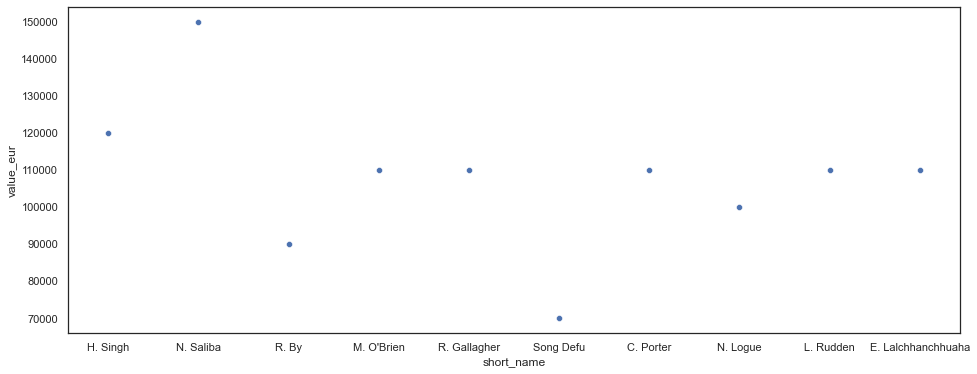

In [249]:
names=df_tail_new['short_name']
value=df_tail_new['value_eur'].astype('int')
fig,ax=plt.subplots(figsize=(16,6))
sns.scatterplot(x=names,y=value,data=df_tail_new)
plt.show()

In [223]:
df_50=df[df.overall<50].select_dtypes(include='number')
df_50.drop(columns=['nation_team_id','nation_jersey_number'],inplace=True)
df_50=df_50.fillna(df_50.mean())
df_50

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
19100,157190,49,49,15000.0,500.0,36,172,70,563.0,1.0,18.0,2021.0,25,3,3,1,23000.0,32.000000,46.000000,53.00000,48.00000,51.00000,46.000000,51,40,49,52,40,43,58,56,50,50,35,29,49,50,76,54,30,30,48,47,65,51,52,56,57,55,53,49,48,7,9,15,6,14,26.227273
19101,243084,49,54,70000.0,2000.0,24,175,72,111779.0,1.0,18.0,2021.0,155,2,2,1,114000.0,65.000000,41.000000,51.00000,54.00000,41.00000,60.000000,42,38,42,58,38,51,44,35,53,51,63,67,63,50,78,49,79,40,75,41,43,24,41,53,48,55,52,41,41,15,12,6,5,12,26.227273
19102,245542,49,64,100000.0,850.0,20,184,83,110734.0,2.0,12.0,2022.0,27,2,1,1,238000.0,61.102564,36.846154,40.42735,45.82906,38.25641,49.384615,13,7,12,22,9,11,15,15,22,14,26,16,31,44,48,33,58,18,66,8,18,7,6,30,12,36,6,11,11,49,51,44,45,50,22.000000
19103,247038,49,66,120000.0,650.0,19,184,75,112828.0,1.0,80.0,2021.0,95,3,2,1,255000.0,47.000000,38.000000,47.00000,52.00000,47.00000,51.000000,36,36,45,53,27,53,37,31,49,51,50,45,56,50,61,45,58,32,58,39,56,47,39,54,41,37,37,56,55,13,12,9,7,11,26.227273
19104,247224,49,55,60000.0,1000.0,24,195,80,112541.0,1.0,1.0,2021.0,155,3,1,1,105000.0,61.102564,36.846154,40.42735,45.82906,38.25641,49.384615,11,6,12,17,9,12,13,13,24,14,32,35,35,41,32,39,44,35,62,5,18,23,4,38,19,27,19,11,14,49,53,52,43,50,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,3,2,1,114000.0,58.000000,35.000000,46.00000,48.00000,42.00000,49.000000,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,26.227273
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,3,2,1,193000.0,59.000000,39.000000,50.00000,46.00000,41.00000,51.000000,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,26.227273
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,3,2,1,175000.0,60.000000,37.000000,45.00000,49.00000,41.00000,52.000000,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,26.227273
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,3,2,1,239000.0,68.000000,46.000000,36.00000,48.00000,15.00000,42.000000,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,26.227273


In [256]:
### don't know this part how to show the players similarity who's value is under 50

In [226]:
from sklearn import preprocessing
x_50 = df_50.values # numpy array
scaler_50 = preprocessing.MinMaxScaler()
x_scaled_50 = scaler.fit_transform(x_50)
X_norm_50 = pd.DataFrame(x_scaled_50)


In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm_50))
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
reduced['cluster'] = clusters
reduced['name'] = df_under50['short_name']
reduced.columns = ['x', 'y', 'cluster', 'name']
df_under50['short_name']

19100            J. Russell
19101          Yang Guoyuan
19102          G. Figliuzzi
19103               J. Haak
19104          Wang Zhifeng
                ...        
19234             Song Defu
19235             C. Porter
19236              N. Logue
19237             L. Rudden
19238    E. Lalchhanchhuaha
Name: short_name, Length: 139, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
fit_reg=False, size = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()